<a href="https://colab.research.google.com/github/rishimj/diabetes-classification-model/blob/main/diabetes_classifier_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#splits matrices into random train and test subsets
from sklearn.model_selection import train_test_split
#Standard scaler works by taking your data subtracting each value by the mean and dividing by the standard deviation
#Finds the stardard score for your data (statistics equation)
#z-score aka standard score (number of standard deviations data is from mean)
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from imblearn.over_sampling import RandomOverSampler



In [66]:
#url is github raw file link
url = 'https://raw.githubusercontent.com/rishimj/diabetes-classification-model/main/diabetes.csv?token=GHSAT0AAAAAACJPHUMCSMXLGEL25HGHTMJCZJ62W2Q'
df = pd.read_csv(url)

In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


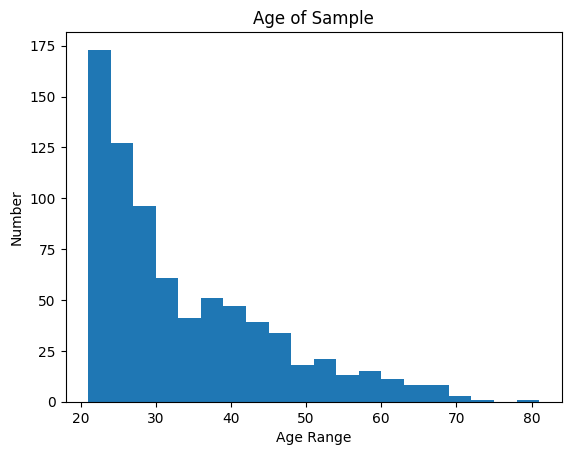

In [68]:
plt.hist(df.Age, bins=20)
plt.title("Age of Sample")
plt.ylabel("Number")
plt.xlabel("Age Range")
plt.show()


In [69]:
#new dataframe of outcome equal to zero
df[df['Outcome']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


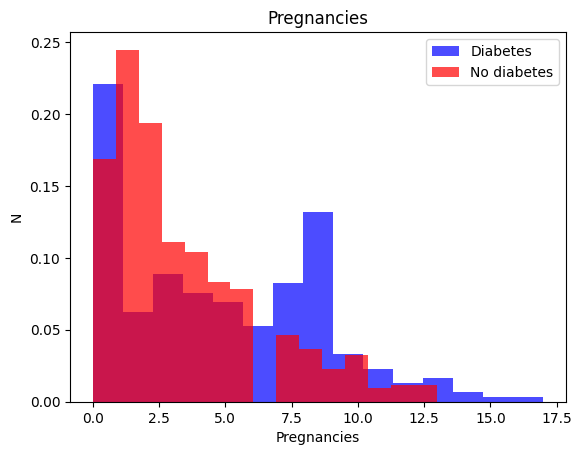

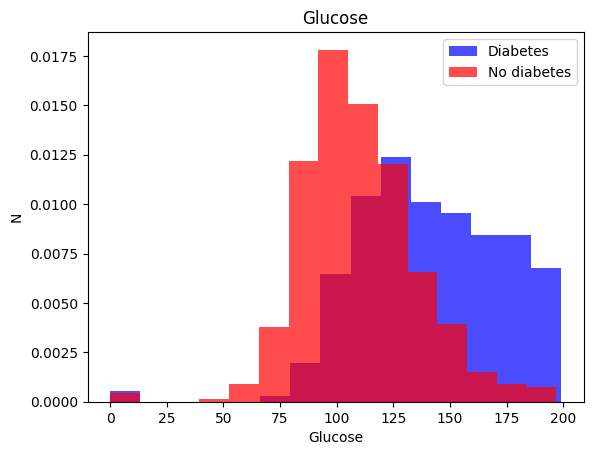

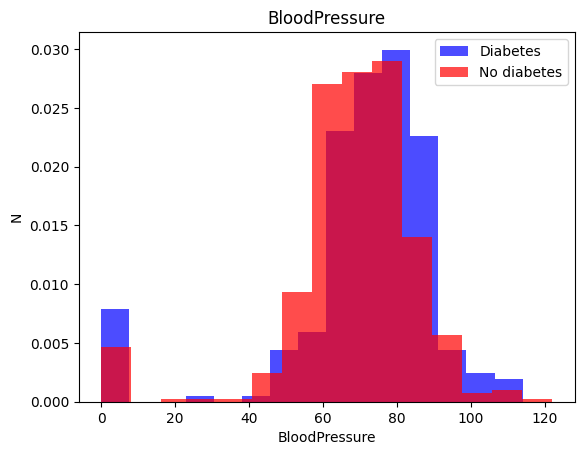

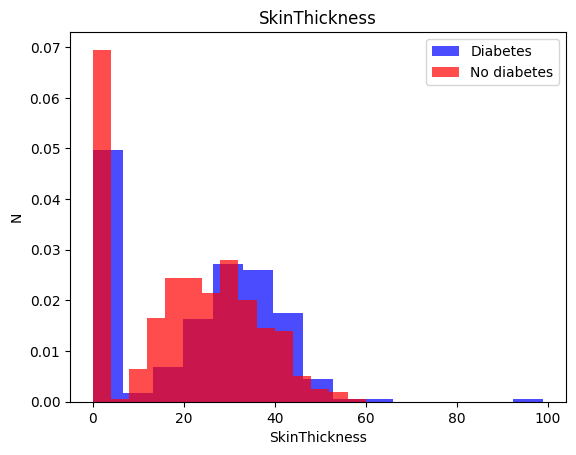

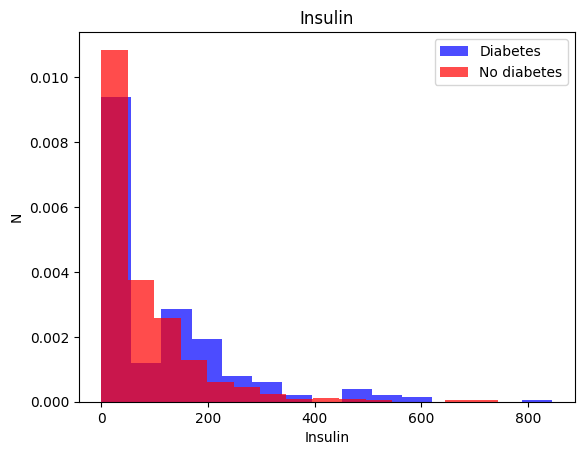

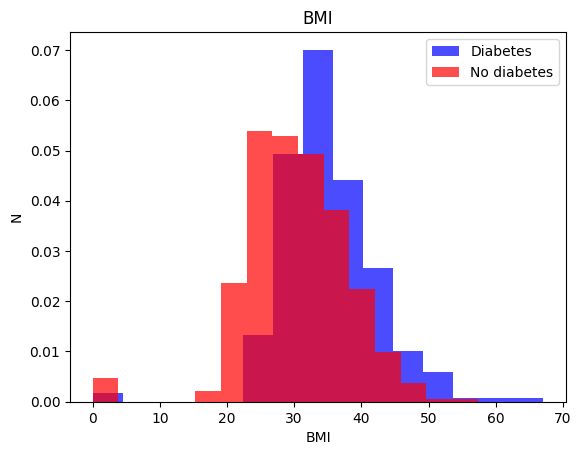

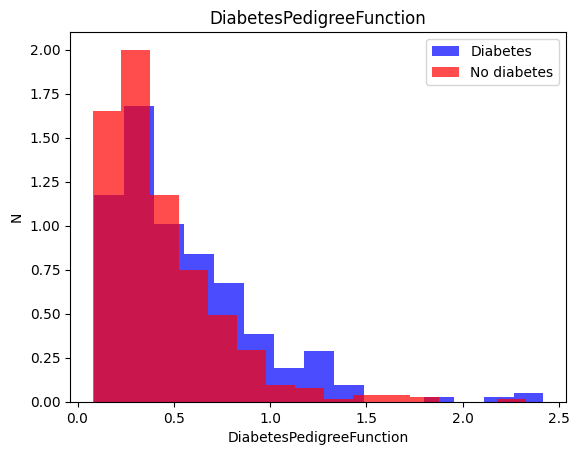

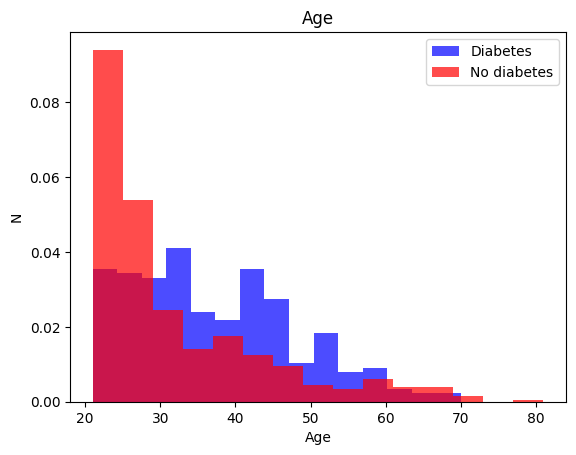

In [70]:
#Loop through each column
for i in range(len(df.columns[:-1])): #df.columns[:-1] means all columns except last
  label = df.columns[i] #.columns returns list of column labels, so looping through each column's label
  plt.hist(df[df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15) #plotting two histograms, this one is where outcome is 1, alpha makes graphs more transparent so you can see the intersection better
  plt.hist(df[df['Outcome']==0][label], color='red', label='No diabetes', alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("N")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [71]:
#Number of people with diabetes vs number without
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [72]:
#Note: [:-1] means all elements but the last
#df.col
X = df[df.columns[:-1]]

In [73]:
#If you compare X with df you can see that the last label is excluded

In [74]:
X = df[df.columns[:-1]].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [75]:
#X is 2d dataframe of just the values

In [76]:
y = df[df.columns[-1]].values

In [77]:
#One dimensonal list of last column in data frame (the label)
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [78]:
scaler = StandardScaler()
#fit then transform X matrix
#Combining two steps --> fit and transform
#fit calculates the mean and standard deviation for each data point
#transform applys standard score calculation in fit to data to transform values to standard scores
X = scaler.fit_transform(X)


In [79]:
#Shape prints dimensions
#X dimension is 768 rows by 8 columns
#y dimension is a vector of 768 rows
X.shape, y.shape

((768, 8), (768,))

In [80]:
#For visualization purposes we can restack our matrix
#Since the dimensions are different in the column dimension (the y-column dimension is not 1, its a vector not a matrix)
#To horizontally stack (put y to the right of x) y column dimension must equal one
#np.reshape reshapes y
#Normally you pass in array as first parameter and dimension as tuple
#In this case tuple (-1,1) --> python uses existing dimension as rows and 1 as number of columns
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)


In [81]:
#new dimensions of transformed_df
transformed_df.shape

(768, 9)

In [82]:
#transformed_df["Outcome"] selects "Outcome" column in dataframe
#transformed_df["Outcome"]==1 applies boolean mask to set each row in the column equal to true or false
#transformed_df[transformed_df["Outcome"]==1], filters df to just rows that are marked true
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])


(268, 500)

We can see from the differences in length that the number of diabetics is greater than nondiabetics which can lead to inaccuracies in our model. Lets add random sample points to the number of diabetic patients to match the number of the nondiabetic.

In [83]:
#RandomOverSampler randomly chooses feature data to duplicate from the minority class to match the number of the majority class
#Can lead to overfitting if minority class is excessively oversampled

over = RandomOverSampler() #creates instance of RandomOverSampler()
X, y = over.fit_resample(X, y)

#Restacking data together, after matching data sizes
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [84]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

Now are dataset is balanced in terms of diabetics and non-diabetics

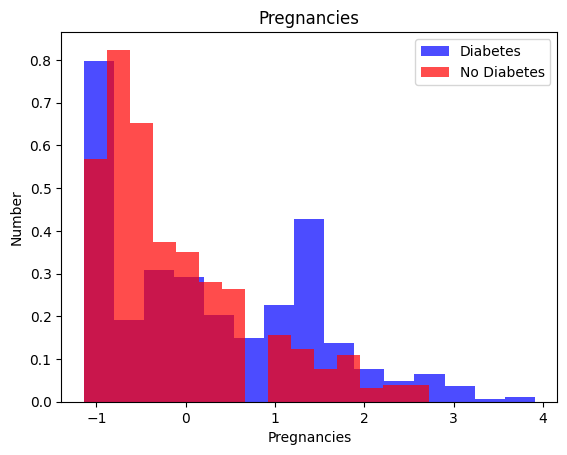

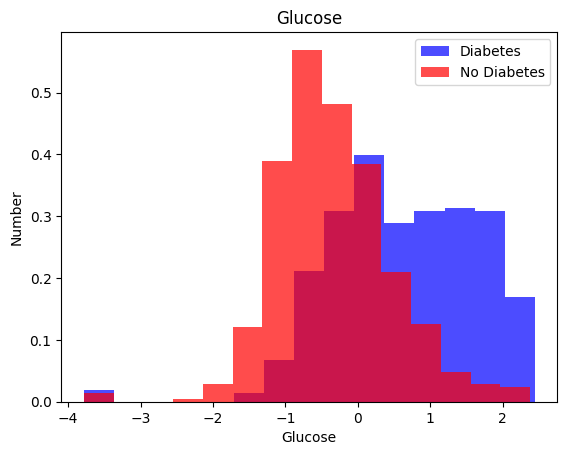

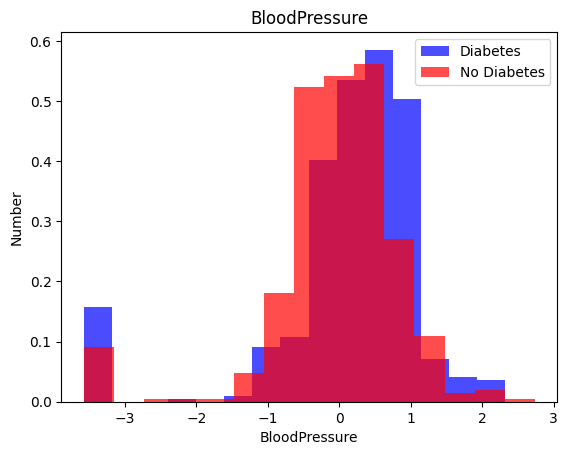

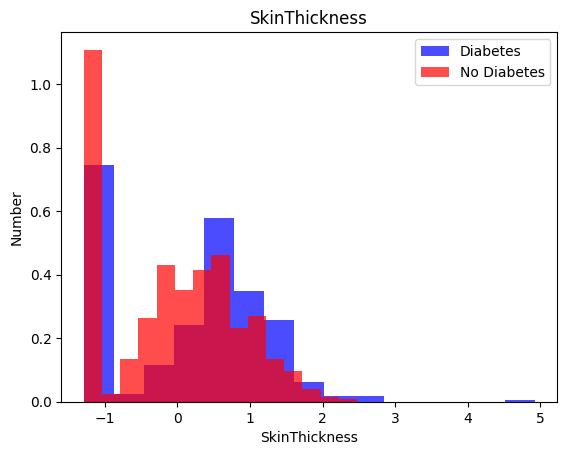

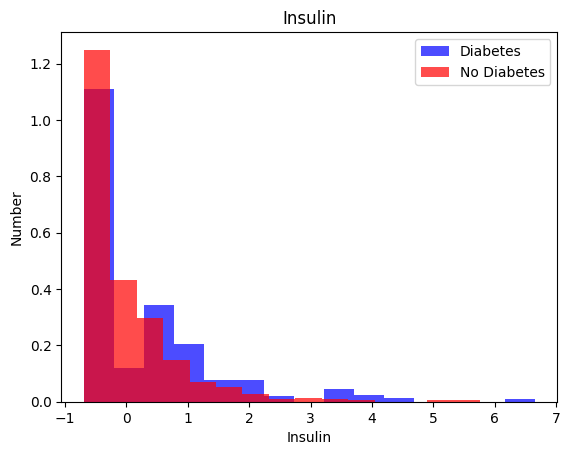

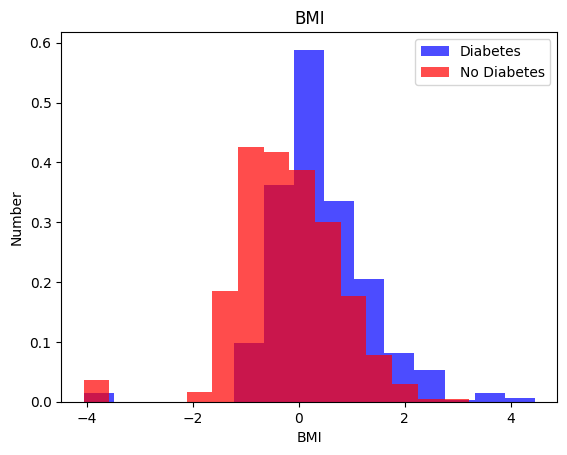

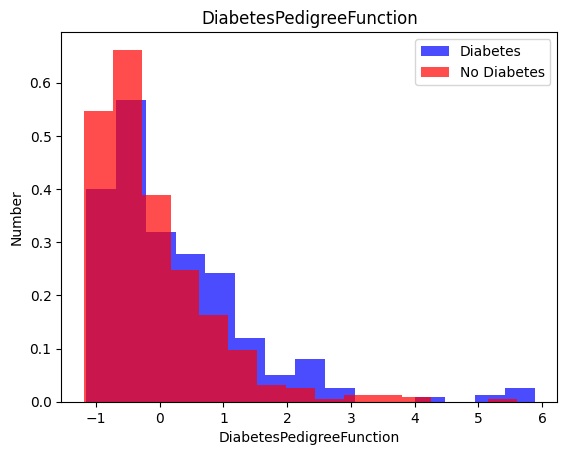

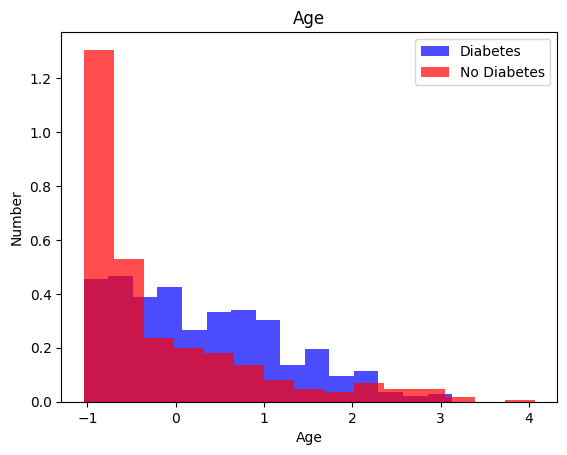

In [85]:
#New transformed_df graphs
#The data is all stardardized
for label in transformed_df.columns[:-1]:
  plt.hist(transformed_df[transformed_df["Outcome"]==1][label], bins=15, color="blue", alpha=0.7, density=True, label="Diabetes")
  plt.hist(transformed_df[transformed_df["Outcome"]==0][label], bins=15, color="red", alpha=0.7, density=True, label="No Diabetes")
  plt.xlabel(label)
  plt.ylabel("Number")
  plt.title(label)
  plt.legend()
  plt.show()


In [86]:
#train_test_split splits our data, (X and y where X is a 2d matrix of the values of every feature, and y is a 1d matrix of the label values)
#60 percent of the data goes to train, while 40 percent goes to temp (X_temp = X_test in this case, just different naming convention)
#Random state is just the initial value used in the number generator to ensure that the data is not reshuffled each time you split data, if you want to do it multiple times (for reproducability purposes basically)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)


In [87]:
#Half of the temp created in the last split is used for validating and the other half is used for testing
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [88]:
#Cumulative Splits
#Train->60 percent (used to train model)
#Valid->20 percent (used to tune the model)
#Test->20 percent (used after training and tuning model to check accuracy)

In [89]:
#keras is a api of tensorflow
#sequential is a model with layers that are sequentially stacked
#dense layers are layers where every node is connected to each other
#weighted sum is used to calculate weights from each connection in the previous layer
#activation function is applied to weighted sum
#reLU-recitifed linear unit --> if num is neg set to 0, else return pos value
#sigmoid --> math function bounded between 0 and 1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [90]:
#optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

#learning rate is the amount the weights are updated during traingin
#loss is different between predicted value an actual
#Since we are doing binary classification we use Binary Crossentropy for loss function
#metrics = ['accuracy'] --> how many are we getting right

In [92]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7220 - accuracy: 0.5417


[0.7220006585121155, 0.5416666865348816]

In [93]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.6050


[0.6877564191818237, 0.6050000190734863]

In [94]:
#The accuracy is so low because the model has not yet been trained
#To train the model fit it
#batch size --> number of training samples in one iteration
#iteration: single gradient update (update of model's weights)
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 0.6752 - accuracy: 0.6200 - val_loss: 0.6259 - val_accuracy: 0.6850
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6159 - accuracy: 0.7100 - val_loss: 0.5915 - val_accuracy: 0.7050
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5835 - accuracy: 0.7233 - val_loss: 0.5707 - val_accuracy: 0.7100
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5621 - accuracy: 0.7383 - val_loss: 0.5530 - val_accuracy: 0.7100
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5460 - accuracy: 0.7450 - val_loss: 0.5411 - val_accuracy: 0.7200
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7383 - val_loss: 0.5286 - val_accuracy: 0.7250
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.7367 - val_loss: 0.5230 - val_accuracy: 0.7200
Epoch 8/20
38/38 [==

In [95]:
#Why is accuracy decreasing? --> Potentially because the features ranges are so different (look at x-axis labels on features and compare ranges! Very different)
#Feature range variation can lead to biassed model performance
#To solve this scale your data ranges to be more similar

#(Updated - solve this problem through random sampling, and standardizing data)


In [96]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.4850 - accuracy: 0.7700


[0.4850403666496277, 0.7699999809265137]

Summary:


*   Trained model to classify patients as diabetic or nondiabetic with 73.5% accuracy based on various features
*   Used diabetes data set

*   Preprocessed data by duplicating random samples to minority set to match majority set and normalized data set through standardization
*   Used sequential model to train data




